In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [8]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [9]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
794,795,0,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,349203,7.8958,NaN,S
795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
797,798,1,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S


In [160]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            14
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          73
Embarked        1
dtype: int64

In [161]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,800,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.00,1,1,345773,24.1500,NaN,S
1,801,2,"Ponesell, Mr. Martin",male,34.00,0,0,250647,13.0000,NaN,S
2,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.00,1,1,C.A. 31921,26.2500,NaN,S
3,803,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S
4,804,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
87,887,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S
88,888,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B42,S
89,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
90,890,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C


In [10]:
#test파일 결측치 처리 및 필요없는 컬럼 제거
df_test_2=df_test
df_test_2["Age"]=df_test_2["Age"].fillna(df_test_2["Age"].median())
df_test_2=df_test_2.drop(["Cabin","Name","PassengerId","Ticket"],axis=1)
df_test_2["Embarked"]=df_test_2["Embarked"].fillna(df_test_2["Embarked"].mode()[0])
print(df_test_2.isnull().sum())
print(df_test_2)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
    Pclass     Sex    Age  SibSp  Parch      Fare Embarked
0        3  female  30.00      1      1   24.1500        S
1        2    male  34.00      0      0   13.0000        S
2        2  female  31.00      1      1   26.2500        S
3        1    male  11.00      1      2  120.0000        S
4        3    male   0.42      0      1    8.5167        C
..     ...     ...    ...    ...    ...       ...      ...
87       2    male  27.00      0      0   13.0000        S
88       1  female  19.00      0      0   30.0000        S
89       3  female  27.50      1      2   23.4500        S
90       1    male  26.00      0      0   30.0000        C
91       3    male  32.00      0      0    7.7500        Q

[92 rows x 7 columns]


In [163]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#데이터 형태 확인
df_train.shape

(799, 12)

In [12]:
#데이터를 컬럼별로 나눠봄
print(df_train.nunique())
cat_cols = ['Pclass','Sex','SibSp','Parch','Embarked']
con_cols=["PassengerId",'Name','Age','Ticket','Fare','Cabin']
target_col = ['Survived']
print("The categorical cols are :",cat_cols)
print("The continuous cols are:",con_cols)
print("The target variable is:",target_col)

PassengerId    799
Survived         2
Pclass           3
Name           799
Sex              2
Age             85
SibSp            7
Parch            7
Ticket         625
Fare           234
Cabin          136
Embarked         3
dtype: int64
The categorical cols are : ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
The continuous cols are: ['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin']
The target variable is: ['Survived']


In [13]:
df_train[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,799.0,400.000000,230.795725,1.00,200.500,400.0,599.500,799.0000
Age,636.0,29.870943,14.555748,0.67,21.000,28.0,38.000,80.0000
Fare,799.0,33.049660,51.556263,0.00,7.925,14.5,31.275,512.3292


In [14]:
#결측치 학인
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            163
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          614
Embarked         1
dtype: int64

In [15]:
# 기본 정보 확인
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  799 non-null    int64  
 1   Survived     799 non-null    int64  
 2   Pclass       799 non-null    int64  
 3   Name         799 non-null    object 
 4   Sex          799 non-null    object 
 5   Age          636 non-null    float64
 6   SibSp        799 non-null    int64  
 7   Parch        799 non-null    int64  
 8   Ticket       799 non-null    object 
 9   Fare         799 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     798 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 75.0+ KB
None


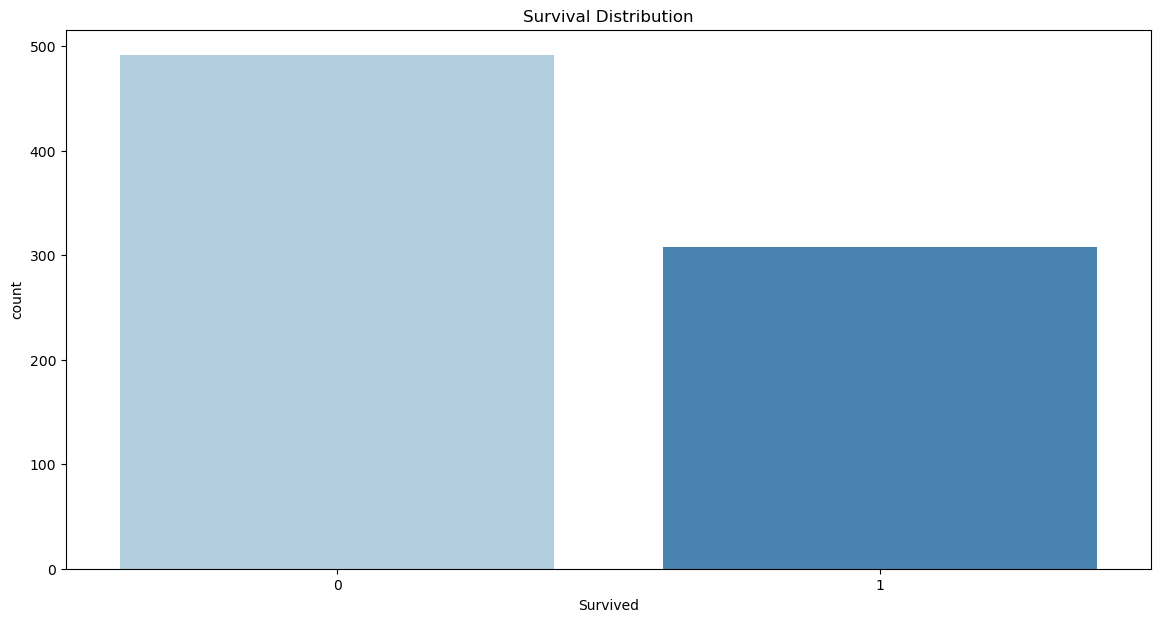

In [16]:
# 분포 확인
plt.figure(figsize=(14, 7))
sns.countplot(x="Survived", data=df_train, palette="Blues")
plt.title("Survival Distribution")
plt.show()

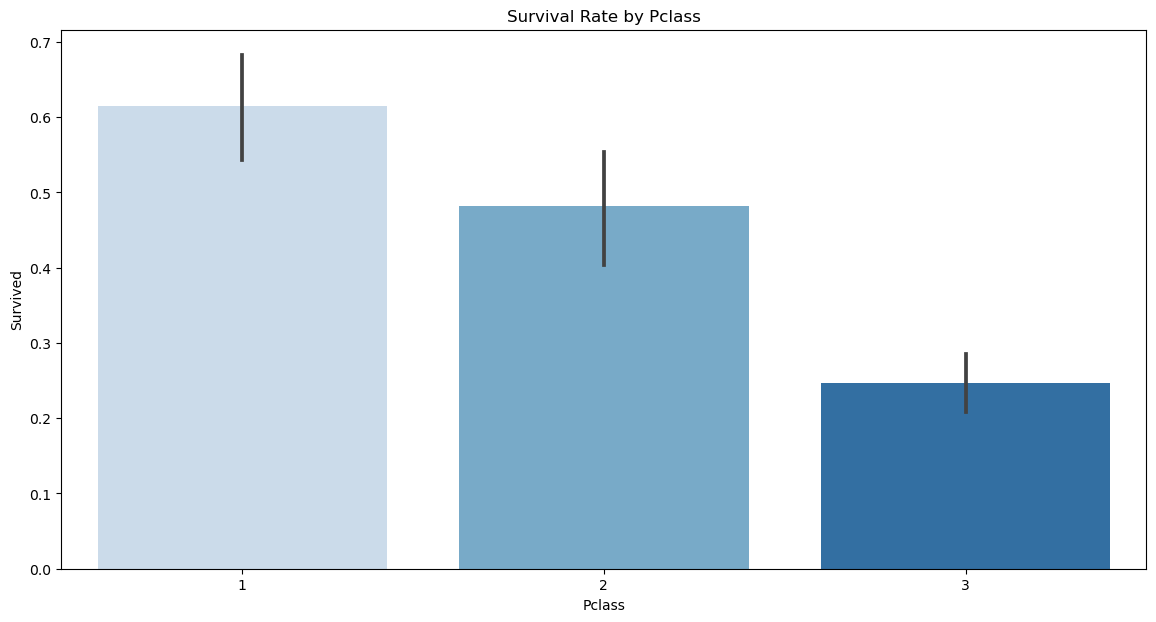

In [17]:
# 객실 등급별 생존율 확인
plt.figure(figsize=(14, 7))
sns.barplot(x="Pclass", y="Survived", data=df_train, palette="Blues")
plt.title("Survival Rate by Pclass")
plt.show()


In [18]:
#train파일 결측치 처리 및 필요없는 컬럼 제거
df_train_2=df_train
df_train_2["Age"]=df_train_2["Age"].fillna(df_train_2["Age"].median())
df_train_2=df_train.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
df_train_2["Embarked"]=df_train_2["Embarked"].fillna(df_train["Embarked"].mode()[0])

print(df_test_2)
print(df_train_2)

    Pclass     Sex    Age  SibSp  Parch      Fare Embarked
0        3  female  30.00      1      1   24.1500        S
1        2    male  34.00      0      0   13.0000        S
2        2  female  31.00      1      1   26.2500        S
3        1    male  11.00      1      2  120.0000        S
4        3    male   0.42      0      1    8.5167        C
..     ...     ...    ...    ...    ...       ...      ...
87       2    male  27.00      0      0   13.0000        S
88       1  female  19.00      0      0   30.0000        S
89       3  female  27.50      1      2   23.4500        S
90       1    male  26.00      0      0   30.0000        C
91       3    male  32.00      0      0    7.7500        Q

[92 rows x 7 columns]
     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250       

In [19]:
cat_cols_2 =['Pclass','Sex','SibSp','Parch','Embarked']

In [20]:
# df_train_2 즉, train 데이터를 ont-hot 인코딩
df_train_2 = pd.get_dummies(df_train_2,columns=cat_cols_2,drop_first=True)
print(df_train_2)

     Survived   Age     Fare  Pclass_2  Pclass_3  Sex_male  SibSp_1  SibSp_2  \
0           0  22.0   7.2500         0         1         1        1        0   
1           1  38.0  71.2833         0         0         0        1        0   
2           1  26.0   7.9250         0         1         0        0        0   
3           1  35.0  53.1000         0         0         0        1        0   
4           0  35.0   8.0500         0         1         1        0        0   
..        ...   ...      ...       ...       ...       ...      ...      ...   
794         0  25.0   7.8958         0         1         1        0        0   
795         0  39.0  13.0000         1         0         1        0        0   
796         1  49.0  25.9292         0         0         0        0        0   
797         1  31.0   8.6833         0         1         0        0        0   
798         0  30.0   7.2292         0         1         1        0        0   

     SibSp_3  SibSp_4  SibSp_5  SibSp_8

In [21]:
# df_test_2 즉, test데이터를 ont-hot 인코딩
df_test_2 = pd.get_dummies(df_test_2,columns=cat_cols_2,drop_first=True)

In [25]:
# 테스트 데이터에 누락된 열 추가
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    df_test_2[col] = 0

In [23]:
print(df_test_2)

      Age      Fare  Pclass_2  Pclass_3  Sex_male  SibSp_1  SibSp_2  SibSp_3  \
0   30.00   24.1500         0         1         0        1        0        0   
1   34.00   13.0000         1         0         1        0        0        0   
2   31.00   26.2500         1         0         0        1        0        0   
3   11.00  120.0000         0         0         1        1        0        0   
4    0.42    8.5167         0         1         1        0        0        0   
..    ...       ...       ...       ...       ...      ...      ...      ...   
87  27.00   13.0000         1         0         1        0        0        0   
88  19.00   30.0000         0         0         0        0        0        0   
89  27.50   23.4500         0         1         0        1        0        0   
90  26.00   30.0000         0         0         1        0        0        0   
91  32.00    7.7500         0         1         1        0        0        0   

    SibSp_4  SibSp_8  Parch_1  Parch_2 

In [30]:
#LogisticRegression 만들어 학습시키고 accuracy 측정
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg=LogisticRegression(penalty='none', C=0.00001,max_iter=10)

X=df_train_2.drop(["Survived"],axis=1)
y=df_train_2[["Survived"]]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
unseendata=df_test_2
print("X_train의 shape",X_train.shape)
print("y_train의 shape",y_train.shape)
print("X_test의 shape",X_test.shape)
print("y_test의 shpae",y_test.shape)
print("test.csv로 받은 unseendat의 shape:",unseendata.shape)


logreg.fit(X_train, y_train)

print("train 데이터 accuracy 점수:",accuracy_score(y_train,logreg.predict(X_train)))




X_train의 shape (639, 19)
y_train의 shape (639, 1)
X_test의 shape (160, 19)
y_test의 shpae (160, 1)
test.csv로 받은 unseendat의 shape: (92, 16)
train 데이터 accuracy 점수: 0.7668231611893583


In [31]:
#X_test에 대한 accuracy 측정
y_pred_proba= logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)
print(y_pred_proba.shape)

print("test 데이터의 accuracy 점수:",accuracy_score(y_test,y_pred))

(160, 2)
test 데이터의 accuracy 점수: 0.75


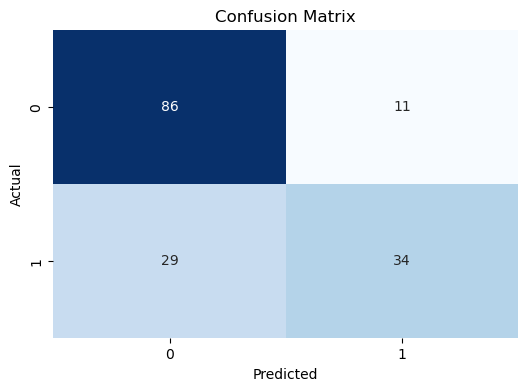

In [29]:
#다른 방법으로 측정 (자세한건 한글파일에)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [204]:
#테스트 데이터에 대한 예측 (test.csv)
unseendata_pred_proba = logreg.predict_proba(unseendata)
unseendata_pred = np.argmax(unseendata_pred_proba,axis=1)
print(unseendata_pred)

[1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0
 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0]


In [206]:
# 예측값 unseendata_pred를 새로운 컬럼 'Survived'에 추가
df_test["Survived"] = unseendata_pred

# 수정된 데이터를 새로운 CSV 파일로 저장
output_file = "test_with_predictions.csv"
df_test.to_csv(output_file, index=False)




In [34]:
n1 = 6/14
n2 = 1
n3=(4/6)**2
n4=(2/6)**2
n1*(n2-n3-n4)

0.19047619047619047